In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model

Using TensorFlow backend.


In [2]:
import keras
cifar10 = keras.datasets.cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten()
print('x_train.shape: ',x_train.shape)
print('y_train.shape: ',y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [3]:
K = len(set(y_train))
print('number of classes: ',K)

number of classes:  10


In [0]:
#Building the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.1)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 69s 1ms/step - loss: 0.7099 - accuracy: 0.7552 - val_loss: 0.7355 - val_accuracy: 0.7466
Epoch 2/20
50000/50000 [==============================] - 66s 1ms/step - loss: 0.5824 - accuracy: 0.7996 - val_loss: 0.6706 - val_accuracy: 0.7791
Epoch 3/20
50000/50000 [==============================] - 65s 1ms/step - loss: 0.4734 - accuracy: 0.8382 - val_loss: 0.7101 - val_accuracy: 0.7686
Epoch 4/20
50000/50000 [==============================] - 64s 1ms/step - loss: 0.3895 - accuracy: 0.8645 - val_loss: 0.7923 - val_accuracy: 0.7711
Epoch 5/20
50000/50000 [==============================] - 64s 1ms/step - loss: 0.3107 - accuracy: 0.8913 - val_loss: 0.6833 - val_accuracy: 0.7872
Epoch 6/20
50000/50000 [==============================] - 64s 1ms/step - loss: 0.2540 - accuracy: 0.9119 - val_loss: 0.6844 - val_accuracy: 0.8057
Epoch 7/20
50000/50000 [==============================] - 63s 1ms/st

In [14]:
batch_size = 32
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=20)

Epoch 1/20
1562/1562 [==============================] - 64s 41ms/step - loss: 0.5962 - accuracy: 0.8101 - val_loss: 0.6337 - val_accuracy: 0.8023
Epoch 2/20
1562/1562 [==============================] - 61s 39ms/step - loss: 0.4724 - accuracy: 0.8445 - val_loss: 0.5090 - val_accuracy: 0.8327
Epoch 3/20
1562/1562 [==============================] - 61s 39ms/step - loss: 0.4222 - accuracy: 0.8595 - val_loss: 0.5412 - val_accuracy: 0.8260
Epoch 4/20
1562/1562 [==============================] - 61s 39ms/step - loss: 0.3920 - accuracy: 0.8676 - val_loss: 0.4904 - val_accuracy: 0.8413
Epoch 5/20
1562/1562 [==============================] - 61s 39ms/step - loss: 0.3719 - accuracy: 0.8744 - val_loss: 0.5022 - val_accuracy: 0.8479
Epoch 6/20
1562/1562 [==============================] - 61s 39ms/step - loss: 0.3505 - accuracy: 0.8793 - val_loss: 0.5408 - val_accuracy: 0.8274
Epoch 7/20
1562/1562 [==============================] - 61s 39ms/step - loss: 0.3321 - accuracy: 0.8881 - val_loss: 0.4428 -

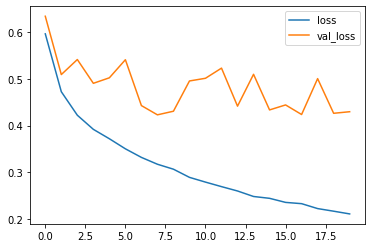

In [15]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

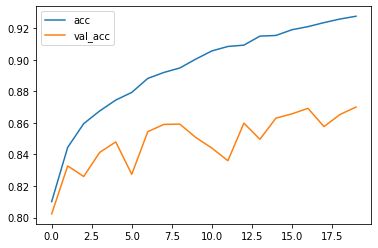

In [16]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

[[911   8  16   8   3   1   2   3  18  30]
 [  8 932   0   1   0   1   0   0   8  50]
 [ 49   1 817  34  36  24  21   7   6   5]
 [ 27   2  40 731  40  88  30  14  11  17]
 [ 13   1  44  28 850  16  13  29   3   3]
 [ 10   4  22 116  28 769  20  22   3   6]
 [  6   2  24  35  11   6 908   2   4   2]
 [  9   2  13  19  19  14   2 917   0   5]
 [ 38   7   3   7   2   0   1   0 916  26]
 [  9  24   3   3   2   1   0   4   5 949]]


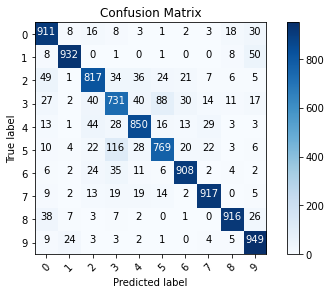

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,title='Confusion Matrix',cmap=plt.cm.Blues):
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment = 'center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label:  truck  Predicted label:  deer')

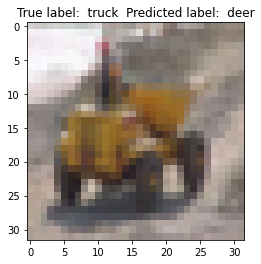

In [28]:
misclassified_idx = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label:  %s  Predicted label:  %s'  % (labels[y_test[i]],labels[p_test[i]]))